In [2]:
#导入
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,auc
from sklearn.metrics import f1_score,classification_report,precision_score,recall_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,LatentDirichletAllocation
from sklearn.decomposition import TruncatedSVD
import umap
import  xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.svm import SVC
import random
import math
from tqdm import tqdm
from scipy import interp
warnings.filterwarnings("ignore")

In [3]:
#数据读入
TCGA_data=pd.read_csv("./TCGA_dataset/gene_sel_data/train.csv",header=None)
GEO_data=pd.read_csv("./GEO_dataset/gene_sel_data/train.csv",header=None)

TCGA_data=TCGA_data.values
GEO_data=GEO_data.values

TCGA_label=pd.read_csv("./TCGA_dataset/train_TCGA_label.csv",header=None)
GEO_label=pd.read_csv("./GEO_dataset/train_GEO_label.csv",header=None)
TCGA_label=list(TCGA_label.loc[:,0])
GEO_label=list(GEO_label.loc[:,0])

In [5]:
GEO_data.shape

(2476, 500)

In [7]:
TCGA_test=pd.read_csv("./TCGA_dataset/gene_sel_data/test_standard.csv",header=None)
GEO_test=pd.read_csv("./GEO_dataset/gene_sel_data/test_standard.csv",header=None)
TCGA_test=TCGA_test.values
GEO_test=GEO_test.values
print(TCGA_test.shape)
print(GEO_test.shape)

TCGA_test_label=pd.read_csv("./TCGA_dataset/test_TCGA_label.csv",header=None)
GEO_test_label=pd.read_csv("./GEO_dataset/test_GEO_label.csv",header=None)
TCGA_test_label=list(TCGA_test_label.loc[:,0])
GEO_test_label=list(GEO_test_label.loc[:,0])
print(len(TCGA_test_label))
print(len(GEO_test_label))

(1148, 800)
(625, 500)
1148
625


In [32]:
#xgboost模型参数读入
import pickle

with open("./model_file/TCGA_clf_xg_all.pickle",'rb') as f :
    TCGA_clf_xg=pickle.load(f)
with open("./model_file/TCGA_clf_knn_all.pickle",'rb') as f :
    TCGA_clf_knn=pickle.load(f)
with open("./model_file/TCGA_clf_lin_all.pickle",'rb') as f :
    TCGA_clf_lin=pickle.load(f)
with open("./model_file/TCGA_clf_rbf_all.pickle",'rb') as f :
    TCGA_clf_rbf=pickle.load(f)
    
    
    

with open("./model_file/GEO_clf_xg_all.pickle",'rb') as f :
    GEO_clf_xg=pickle.load(f)
with open("./model_file/GEO_clf_knn_all.pickle",'rb') as f :
    GEO_clf_knn=pickle.load(f)
with open("./model_file/GEO_clf_lg_all.pickle",'rb') as f :
    GEO_clf_lg=pickle.load(f)
with open("./model_file/GEO_clf_rbf_all.pickle",'rb') as f :
    GEO_clf_rbf=pickle.load(f)

In [14]:
TCGA_pre=TCGA_clf_xg.predict(TCGA_test)
TCGA_pre_pro=TCGA_clf_xg.predict_proba(TCGA_test)
TCGA_confu=confusion_matrix(TCGA_test_label,TCGA_pre)

In [50]:
def score_get(test_label,pre_label):
    res=[]
    res.append(precision_score(test_label,pre_label,average='micro'))
    res.append(recall_score(test_label,pre_label,average='micro'))
    res.append(f1_score(test_label,pre_label,average='micro'))
    res.append(precision_score(test_label,pre_label,average='macro'))
    res.append(recall_score(test_label,pre_label,average='macro'))
    res.append(f1_score(test_label,pre_label,average='macro'))
    return res

In [53]:
TCGA_eva_name=['macro_p','macro_r','macro_f1','micro_p','micro_r','micro_f1']
TCGA_eva_num=[]

TCGA_pre=TCGA_clf_xg.predict(TCGA_test)
TCGA_eva_num.append(score_get(TCGA_test_label,TCGA_pre))

TCGA_pre=TCGA_clf_knn.predict(TCGA_test)
TCGA_eva_num.append(score_get(TCGA_test_label,TCGA_pre))

TCGA_pre=TCGA_clf_lin.predict(TCGA_test)
TCGA_eva_num.append(score_get(TCGA_test_label,TCGA_pre))

TCGA_pre=TCGA_clf_rbf.predict(TCGA_test)
TCGA_eva_num.append(score_get(TCGA_test_label,TCGA_pre))

In [56]:
GEO_eva_name=['macro_p','macro_r','macro_f1','micro_p','micro_r','micro_f1']
GEO_eva_num=[]

GEO_pre=GEO_clf_xg.predict(GEO_test)
GEO_eva_num.append(score_get(GEO_test_label,GEO_pre))

GEO_pre=GEO_clf_knn.predict(GEO_test)
GEO_eva_num.append(score_get(GEO_test_label,GEO_pre))

GEO_pre=GEO_clf_lg.predict(GEO_test)
GEO_eva_num.append(score_get(GEO_test_label,GEO_pre))

GEO_pre=GEO_clf_rbf.predict(GEO_test)
GEO_eva_num.append(score_get(GEO_test_label,GEO_pre))

In [100]:
model_name_TCGA=['xgboost','knn','svm_lin','svm_rbf']
model_name_GEO=['xgboost','knn','lg','svm_rbf']

TCGA_val_data=pd.DataFrame(data=np.array(TCGA_eva_num),index=model_name_TCGA,
                           columns=TCGA_eva_name)
TCGA_val_data

,macro_p,macro_r,macro_f1,micro_p,micro_r,micro_f1
xgboost,0.987805,0.987805,0.987805,0.983096,0.982836,0.982726
knn,0.945122,0.945122,0.945122,0.930619,0.945949,0.937311
svm_lin,0.975610,0.975610,0.975610,0.969181,0.972269,0.970366
svm_rbf,0.949477,0.949477,0.949477,0.966819,0.932290,0.947004


In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid',font_scale=1.3)
plt.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

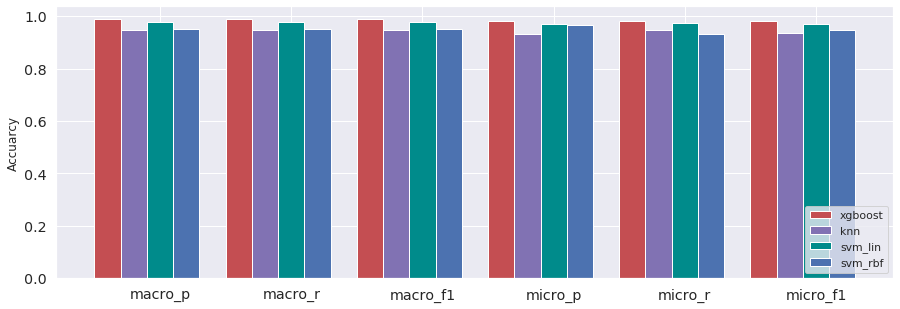

In [108]:
plt.figure(figsize=(15,5))
bar_width=0.2
index_xgboost=np.arange(len(TCGA_eva_name))
index_knn=index_xgboost+bar_width
index_svm_lin=index_knn+bar_width
index_svm_rbf=index_svm_lin+bar_width

plt.bar(index_xgboost,height=TCGA_val_data.loc['xgboost',:].values,width=bar_width,
       color='r',label='xgboost')
plt.bar(index_knn,height=TCGA_val_data.loc['knn',:].values,width=bar_width,
       color='m',label='knn')
plt.bar(index_svm_lin,height=TCGA_val_data.loc['svm_lin',:].values,width=bar_width,
       color='darkcyan',label='svm_lin')
plt.bar(index_svm_rbf,height=TCGA_val_data.loc['svm_rbf',:].values,width=bar_width,
       color='b',label='svm_rbf')

plt.legend(fontsize='x-small',loc='lower right')
plt.xticks(index_xgboost+bar_width*2,TCGA_eva_name)
plt.ylabel('Accuarcy',size=12)
plt.savefig("./TCGA_dataset/plot/TCGA_test_val.jpg",dpi=175)
plt.show()

In [101]:
GEO_val_data=pd.DataFrame(data=np.array(GEO_eva_num),index=model_name_GEO,
                           columns=GEO_eva_name)
GEO_val_data

,macro_p,macro_r,macro_f1,micro_p,micro_r,micro_f1
xgboost,0.9904,0.9904,0.9904,0.974420,0.973062,0.972937
knn,0.9760,0.9760,0.9760,0.964050,0.983842,0.972498
svm_lg,0.8288,0.8288,0.8288,0.743622,0.869644,0.761514
svm_rbf,0.4688,0.4688,0.4688,0.718870,0.570431,0.498751


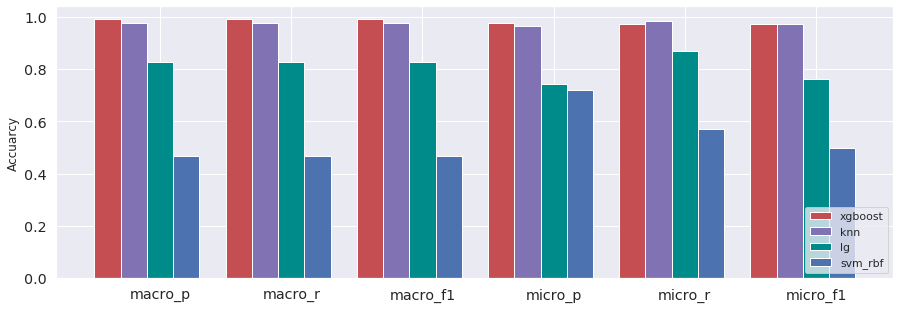

In [107]:
plt.figure(figsize=(15,5))
bar_width=0.2
index_xgboost=np.arange(len(GEO_eva_name))
index_knn=index_xgboost+bar_width
index_svm_lin=index_knn+bar_width
index_svm_rbf=index_svm_lin+bar_width

plt.bar(index_xgboost,height=GEO_val_data.loc['xgboost',:].values,width=bar_width,
       color='r',label='xgboost')
plt.bar(index_knn,height=GEO_val_data.loc['knn',:].values,width=bar_width,
       color='m',label='knn')
plt.bar(index_svm_lin,height=GEO_val_data.loc['svm_lg',:].values,width=bar_width,
       color='darkcyan',label='lg')
plt.bar(index_svm_rbf,height=GEO_val_data.loc['svm_rbf',:].values,width=bar_width,
       color='b',label='svm_rbf')

plt.legend(fontsize='x-small',loc='lower right')
plt.xticks(index_xgboost+bar_width*2,GEO_eva_name)
plt.ylabel('Accuarcy',size=12)
plt.savefig("./GEO_dataset/plot/GEO_test_val.jpg",dpi=175)
plt.show()

In [29]:
#ONE_HOT编码
TCGA_test_ont=np.array([[0]*15]*len(TCGA_test_label))
GEO_test_ont=np.array([[0]*11]*len(GEO_test_label))

for i in range (len(TCGA_test_label)):
    TCGA_test_ont[i][int(TCGA_test_label[i])]=1
for i in range (len(GEO_test_label)):
    GEO_test_ont[i][int(GEO_test_label[i])]=1

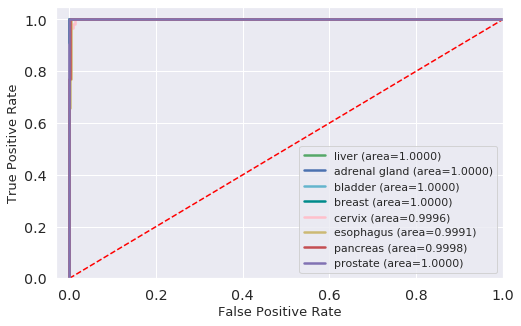

In [114]:
#ROC
fpr=dict()
tpr=dict()
roc_auc=dict()
n_class=15
TCGA_score=TCGA_clf_xg.predict_proba(TCGA_test)
TCGA_score=np.array(TCGA_score)
for i  in range(n_class):
    fpr[i],tpr[i],_=roc_curve(TCGA_test_ont[:,i],TCGA_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
#fpr['micro'],tpr['micro'],_=roc_curve(TCGA_test_ont.ravel(),TCGA_score.ravel())
#roc_auc['micro']=auc(fpr['micro'],tpr['micro'])
all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
mean_tpr=np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr+=interp(all_fpr,fpr[i],tpr[i])
mean_tpr/=n_class
fpr['macro']=all_fpr
tpr['macro']=mean_tpr
roc_auc['macro']=auc(fpr['macro'],tpr['macro'])



plt.figure(figsize=(8,5))
#线条宽度
lw=2.5
plt.plot([0,1],[0,1],color='red',lw=1.5,linestyle='--')
plt.plot(fpr[0],tpr[0],color='g',lw=lw,label='liver (area=%0.4f)'%roc_aucs[0])
plt.plot(fpr[1],tpr[1],color='b',lw=lw,label='adrenal gland (area=%0.4f)'%roc_aucs[1])
plt.plot(fpr[2],tpr[2],color='c',lw=lw,label='bladder (area=%0.4f)'%roc_aucs[2])
plt.plot(fpr[3],tpr[3],color='darkcyan',lw=lw,label='breast (area=%0.4f)'%roc_aucs[3])
plt.plot(fpr[4],tpr[4],color='pink',lw=lw,label='cervix (area=%0.4f)'%roc_aucs[4])
plt.plot(fpr[5],tpr[5],color='y',lw=lw,label='esophagus (area=%0.4f)'%roc_aucs[5])
plt.plot(fpr[6],tpr[6],color='r',lw=lw,label='pancreas (area=%0.4f)'%roc_aucs[6])
plt.plot(fpr[7],tpr[7],color='m',lw=lw,label='prostate (area=%0.4f)'%roc_aucs[7])

plt.xlim([-0.03,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize='small')
plt.ylabel('True Positive Rate',fontsize='small')


plt.legend(fontsize='x-small',loc='lower right')
plt.savefig("./TCGA_dataset/plot/TCGA_roc_1.jpg",dpi=175)
plt.show()

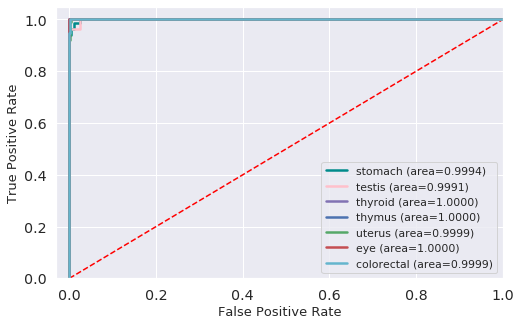

In [116]:
plt.figure(figsize=(8,5))
#线条宽度
lw=2.5
plt.plot([0,1],[0,1],color='red',lw=1.5,linestyle='--')

plt.plot(fpr[8],tpr[8],color='darkcyan',lw=lw,label='stomach (area=%0.4f)'%roc_aucs[8])
plt.plot(fpr[9],tpr[9],color='pink',lw=lw,label='testis (area=%0.4f)'%roc_aucs[9])
plt.plot(fpr[10],tpr[10],color='m',lw=lw,label='thyroid (area=%0.4f)'%roc_aucs[10])
plt.plot(fpr[11],tpr[11],color='b',lw=lw,label='thymus (area=%0.4f)'%roc_aucs[11])
plt.plot(fpr[12],tpr[12],color='g',lw=lw,label='uterus (area=%0.4f)'%roc_aucs[12])
plt.plot(fpr[13],tpr[13],color='r',lw=lw,label='eye (area=%0.4f)'%roc_aucs[13])
plt.plot(fpr[14],tpr[14],color='c',lw=lw,label='colorectal (area=%0.4f)'%roc_aucs[14])
plt.xlim([-0.03,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize='small')
plt.ylabel('True Positive Rate',fontsize='small')


plt.legend(fontsize='x-small',loc='lower right')
plt.savefig("./TCGA_dataset/plot/TCGA_roc_2.jpg",dpi=175)
plt.show()

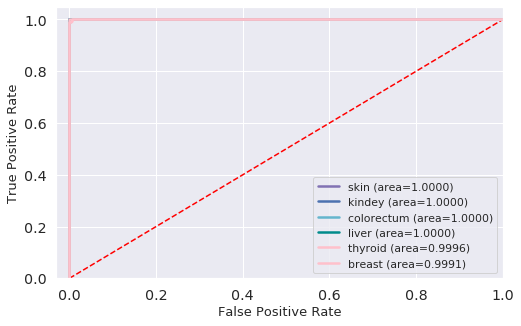

In [110]:
#ROC
fpr=dict()
tpr=dict()
roc_auc=dict()
n_class=11
GEO_score=GEO_clf_xg.predict_proba(GEO_test)
GEO_score=np.array(GEO_score)
for i  in range(n_class):
    fpr[i],tpr[i],_=roc_curve(GEO_test_ont[:,i],GEO_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
#fpr['micro'],tpr['micro'],_=roc_curve(TCGA_test_ont.ravel(),TCGA_score.ravel())
#roc_auc['micro']=auc(fpr['micro'],tpr['micro'])
all_fpr=np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
mean_tpr=np.zeros_like(all_fpr)
for i in range(n_class):
    mean_tpr+=interp(all_fpr,fpr[i],tpr[i])
mean_tpr/=n_class
fpr['macro']=all_fpr
tpr['macro']=mean_tpr
roc_auc['macro']=auc(fpr['macro'],tpr['macro'])



plt.figure(figsize=(8,5))
#线条宽度
lw=2.5
plt.plot([0,1],[0,1],color='red',lw=1.5,linestyle='--')
plt.plot(fpr[0],tpr[0],color='m',lw=lw,label='skin (area=%0.4f)'%roc_aucs[0])
plt.plot(fpr[1],tpr[1],color='b',lw=lw,label='kindey (area=%0.4f)'%roc_aucs[1])
plt.plot(fpr[2],tpr[2],color='c',lw=lw,label='colorectum (area=%0.4f)'%roc_aucs[2])
plt.plot(fpr[3],tpr[3],color='darkcyan',lw=lw,label='liver (area=%0.4f)'%roc_aucs[3])
plt.plot(fpr[4],tpr[4],color='pink',lw=lw,label='thyroid (area=%0.4f)'%roc_aucs[4])
plt.plot(fpr[5],tpr[5],color='pink',lw=lw,label='breast (area=%0.4f)'%roc_aucs[5])
plt.xlim([-0.03,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize='small')
plt.ylabel('True Positive Rate',fontsize='small')


plt.legend(fontsize='x-small',loc='lower right')
plt.savefig("./GEO_dataset/plot/GEO_roc_1.jpg",dpi=175)
plt.show()

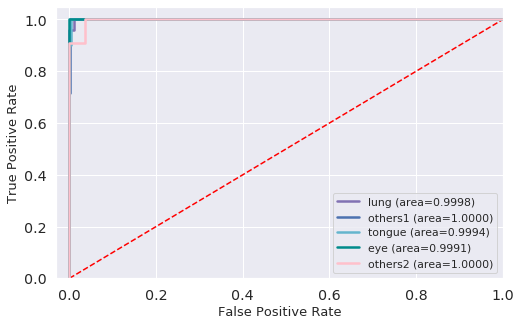

In [111]:
plt.figure(figsize=(8,5))
#线条宽度
lw=2.5
plt.plot([0,1],[0,1],color='red',lw=1.5,linestyle='--')
plt.plot(fpr[6],tpr[6],color='m',lw=lw,label='lung (area=%0.4f)'%roc_aucs[6])
plt.plot(fpr[7],tpr[7],color='b',lw=lw,label='others1 (area=%0.4f)'%roc_aucs[7])
plt.plot(fpr[8],tpr[8],color='c',lw=lw,label='tongue (area=%0.4f)'%roc_aucs[8])
plt.plot(fpr[9],tpr[9],color='darkcyan',lw=lw,label='eye (area=%0.4f)'%roc_aucs[9])
plt.plot(fpr[10],tpr[10],color='pink',lw=lw,label='others2 (area=%0.4f)'%roc_aucs[10])
plt.xlim([-0.03,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate',fontsize='small')
plt.ylabel('True Positive Rate',fontsize='small')


plt.legend(fontsize='x-small',loc='lower right')
plt.savefig("./GEO_dataset/plot/GEO_roc_2.jpg",dpi=175)
plt.show()